<a href="https://colab.research.google.com/github/icebearian/CS221-Natural-Language-Processing/blob/master/PosTaggingCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đề tài: **Gán nhãn từ loại cho tiếng Việt sử dụng Hidden Markov Model**
---

# **Dataset**
*Được sưu tập và gán nhãn thủ công, đã qua xử lý tách từ*<br>
*Nhãn được sử dụng theo từ điển của VLSP* (
[VLSP Pos tag](https://vlsp.hpda.vn/demo/vcl/PoSTag.htm))

---
> Bao gồm **40** câu đã được gán nhãn từ loại:
- **35** câu dùng để train
- **5** câu dùng để làm dữ liệu **gold** cho quá trình tính toán độ chính xác.

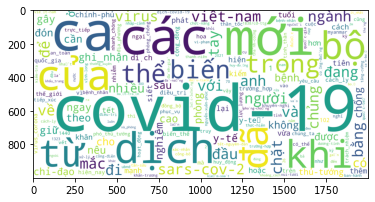

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
background_color = "#FFFFFF"
height = 1000
width = 2000
with open("WordCloud.txt", "r") as f:
    words = f.read().split()
data = dict()
for word in words:
    word = word.lower()
    data[word] = data.get(word, 0) + 1

word_cloud = WordCloud(
    background_color=background_color,
    width=width,
    height=height
)

word_cloud.generate_from_frequencies(data)
word_cloud.to_file('image.png')
plt.imshow(mpimg.imread('image.png'))


In [1]:
gold_data = [('Alex', 'NNP'),('was', 'NNP'),('born', 'VB'),('in', 'NNP'),('California', 'NNP')]

In [2]:
train_data = [
              [('Alex', 'NNP'), ('was', 'NNP'), ('born', 'NNP'), ('in', 'NNP'), ('Connecticut', 'NNP'), ('.', 'NNP')],
              [('Joe', 'NNP'), ('met', 'VBD'), ('Joanne', 'NNP'), ('in', 'IN'), ('Delhi', 'NNP'), ('.', 'NNP')],
              [('Chicago', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('birthpace', 'NNP'), ('of', 'NNP'), ('Ginny', 'NNP')]
              ]
#print ("Train data:", train_data)

# **GÁN NHÃN TỪ LOẠI (PART-OF-SPEECH Tagging)**
---



# **Học từ dữ liệu đã được gán nhãn**
---
Sử dụng mô hình **Hidden Markov Model** với phương pháp smoothing là **Laplace**.:


In [3]:
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.probability import LaplaceProbDist
trainer = HiddenMarkovModelTrainer()
tagger = trainer.train_supervised(train_data,estimator=LaplaceProbDist)

# **Đánh giá**
---
Sử dụng độ chính xác **(Accuracy)** bằng công thức:<br>
$Acc = \frac{n}{N}$<br>
- $n$ là số lượng nhãn dự đoán đúng
- $N$ là tổng số lượng nhãn (tương ứng với số lượng
từ) trong ngữ liệu Gold.<br>

In [4]:
INPUT = input("Test: ")
#Alex was born in California
pos =tagger.tag(INPUT.split())
print("Gold:",gold_data)
count = 0
for i in range(len(pos)):
  if pos[i][1] == gold_data[i][1]:
    count += 1
print("Kết quả dự đoán: ",pos)
print("Accuracy:",count/len(pos))

Test: Alex was born in California
Gold: [('Alex', 'NNP'), ('was', 'NNP'), ('born', 'VB'), ('in', 'NNP'), ('California', 'NNP')]
Kết quả dự đoán:  [('Alex', 'NNP'), ('was', 'NNP'), ('born', 'NNP'), ('in', 'NNP'), ('California', 'NNP')]
Accuracy: 0.8
